In [103]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, UpSampling1D, Input, Dropout
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model


In [104]:
# dataset = pd.read_csv('/content/drive/MyDrive/R03_25.unknown')
dataset = pd.read_csv("./R03_25")


In [105]:
dataset.drop(columns={"Unnamed: 0"}, inplace=True)

In [106]:
dataset.head()

,Fc5.,Fc3.,Fc1.,Fcz.,Fc2.,Fc4.,Fc6.,C5..,C3..,C1..,...,Po7.,Po3.,Poz.,Po4.,Po8.,O1..,Oz..,O2..,Iz..,label
0,-57.0,-13.0,-15.0,-12.0,-13.0,-8.0,-40.0,-54.0,-12.0,-14.0,...,-38.0,-42.0,-68.0,-76.0,-103.0,-51.0,-56.0,-124.0,-28.0,0
1,-49.0,-11.0,-10.0,-12.0,-19.0,-24.0,-58.0,-51.0,-19.0,-23.0,...,-55.0,-63.0,-82.0,-87.0,-99.0,-59.0,-70.0,-149.0,-40.0,0
2,-55.0,-17.0,-16.0,-19.0,-24.0,-29.0,-66.0,-61.0,-30.0,-36.0,...,-63.0,-72.0,-91.0,-92.0,-91.0,-67.0,-77.0,-153.0,-37.0,0
3,-73.0,-42.0,-40.0,-37.0,-37.0,-40.0,-71.0,-78.0,-53.0,-53.0,...,-52.0,-66.0,-100.0,-105.0,-105.0,-67.0,-72.0,-148.0,-26.0,0
4,-87.0,-53.0,-52.0,-51.0,-45.0,-43.0,-71.0,-87.0,-65.0,-64.0,...,-82.0,-90.0,-117.0,-119.0,-118.0,-75.0,-82.0,-161.0,-35.0,0


In [107]:
from sklearn.model_selection import train_test_split
X = dataset.drop(columns={"label"})
Y = dataset['label']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = np.array(X_train)
X_test = np.array(X_test)
scaler = StandardScaler()
X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_reshaped = X_train_scaled.reshape(X_train.shape[0],X_train.shape[1],1)
X_test_reshaped = X_test_scaled.reshape(X_test.shape[0],X_test.shape[1],1)




In [108]:
train_accuracies = []

In [109]:
input_shape = (X_train_reshaped.shape[1], 1)

# Encoder
encoder_input = Input(shape=input_shape)
encoder = Conv1D(32, kernel_size=3, activation='relu', padding='same')(encoder_input)
encoder = MaxPooling1D(pool_size=2, padding='same')(encoder)
encoder = Conv1D(64, kernel_size=3, activation='relu', padding='same')(encoder)
encoder = MaxPooling1D(pool_size=2, padding='same')(encoder)

# Decoder
decoder = Conv1D(64, kernel_size=3, activation='relu', padding='same')(encoder)
decoder = UpSampling1D(size=2)(decoder)
decoder = Conv1D(32, kernel_size=3, activation='relu', padding='same')(decoder)
decoder = UpSampling1D(size=2)(decoder)
decoder_output = Conv1D(1, kernel_size=3, activation='sigmoid', padding='same')(decoder)
print("decoder output shape: ",decoder_output.shape)

autoencoder = Model(inputs=encoder_input, outputs=decoder_output)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

autoencoder.summary()


decoder output shape:  (?, 64, 1)
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 64, 1)]           0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 64, 32)            128       
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 32, 32)            0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 32, 64)            6208      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 16, 64)            0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 16, 64)            12352     
_________________________________________________________________
up_sampling1d_18 (UpSamp

In [110]:
classification = Conv1D(32, kernel_size=3, activation='relu', padding='same')(decoder_output)
classification = MaxPooling1D(pool_size=2, padding='same')(classification)
# classification = Conv1D(64, kernel_size=3, activation='relu', padding='same')(classification)
# classification = MaxPooling1D(pool_size=2, padding='same')(classification)
# classification = Conv1D(128, kernel_size=3, activation='relu', padding='same')(classification)
# classification = MaxPooling1D(pool_size=2, padding='same')(classification)
# classification = Conv1D(256, kernel_size=3, activation='relu', padding='same')(classification)
# classification = MaxPooling1D(pool_size=2, padding='same')(classification)

classification = Flatten()(classification)
classification = Dense(128, activation='relu')(classification)
classification_output = Dense(3, activation='softmax')(classification)

In [111]:
combined_model = Model(inputs=encoder_input, outputs=classification_output)
combined_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

combined_model.summary()


Model: "model_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 64, 1)]           0         
_________________________________________________________________
conv1d_70 (Conv1D)           (None, 64, 32)            128       
_________________________________________________________________
max_pooling1d_43 (MaxPooling (None, 32, 32)            0         
_________________________________________________________________
conv1d_71 (Conv1D)           (None, 32, 64)            6208      
_________________________________________________________________
max_pooling1d_44 (MaxPooling (None, 16, 64)            0         
_________________________________________________________________
conv1d_72 (Conv1D)           (None, 16, 64)            12352     
_________________________________________________________________
up_sampling1d_18 (UpSampling (None, 32, 64)            0  

In [112]:
epochs = 10
for epoch in range(epochs):
    print("epoch : ",epoch+1)
    history = combined_model.fit(X_train_reshaped, Y_train, epochs=1)
    train_accuracies.append(history.history['acc'])
    

epoch :  1
Train on 394560 samples
394560/394560 [==============================] - 68s 172us/sample - loss: 0.9603 - acc: 0.5424
epoch :  2
Train on 394560 samples
394560/394560 [==============================] - 67s 171us/sample - loss: 0.8305 - acc: 0.6153
epoch :  3
Train on 394560 samples
394560/394560 [==============================] - 67s 170us/sample - loss: 0.7649 - acc: 0.6482
epoch :  4
Train on 394560 samples
394560/394560 [==============================] - 68s 172us/sample - loss: 0.7253 - acc: 0.6680
epoch :  5
Train on 394560 samples
394560/394560 [==============================] - 67s 170us/sample - loss: 0.6967 - acc: 0.6812
epoch :  6
Train on 394560 samples
394560/394560 [==============================] - 66s 167us/sample - loss: 0.6762 - acc: 0.6908
epoch :  7
Train on 394560 samples
394560/394560 [==============================] - 67s 171us/sample - loss: 0.6581 - acc: 0.6988
epoch :  8
Train on 394560 samples
394560/394560 [==============================] - 68s 17

Test Loss: 0.6433
Test Accuracy: 0.7073


In [114]:
epochs = 90
for epoch in range(epochs):
    print("epoch : ",epoch+11)
    history = combined_model.fit(X_train_reshaped, Y_train, epochs=1)
    train_accuracies.append(history.history['acc'])

epoch :  11
Train on 394560 samples
394560/394560 [==============================] - 67s 170us/sample - loss: 0.6124 - acc: 0.7201
epoch :  12
Train on 394560 samples
394560/394560 [==============================] - 67s 169us/sample - loss: 0.6047 - acc: 0.7240
epoch :  13
Train on 394560 samples
394560/394560 [==============================] - 67s 171us/sample - loss: 0.5973 - acc: 0.7268
epoch :  14
Train on 394560 samples
394560/394560 [==============================] - 67s 169us/sample - loss: 0.5914 - acc: 0.7297
epoch :  15
Train on 394560 samples
394560/394560 [==============================] - 67s 169us/sample - loss: 0.5855 - acc: 0.7324
epoch :  16
Train on 394560 samples
394560/394560 [==============================] - 66s 168us/sample - loss: 0.5802 - acc: 0.7347
epoch :  17
Train on 394560 samples
394560/394560 [==============================] - 67s 170us/sample - loss: 0.5762 - acc: 0.7371
epoch :  18
Train on 394560 samples
394560/394560 [==============================] 

In [115]:
test_loss, test_accuracy = combined_model.evaluate(X_test_reshaped, Y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Loss: 0.5886
Test Accuracy: 0.7434


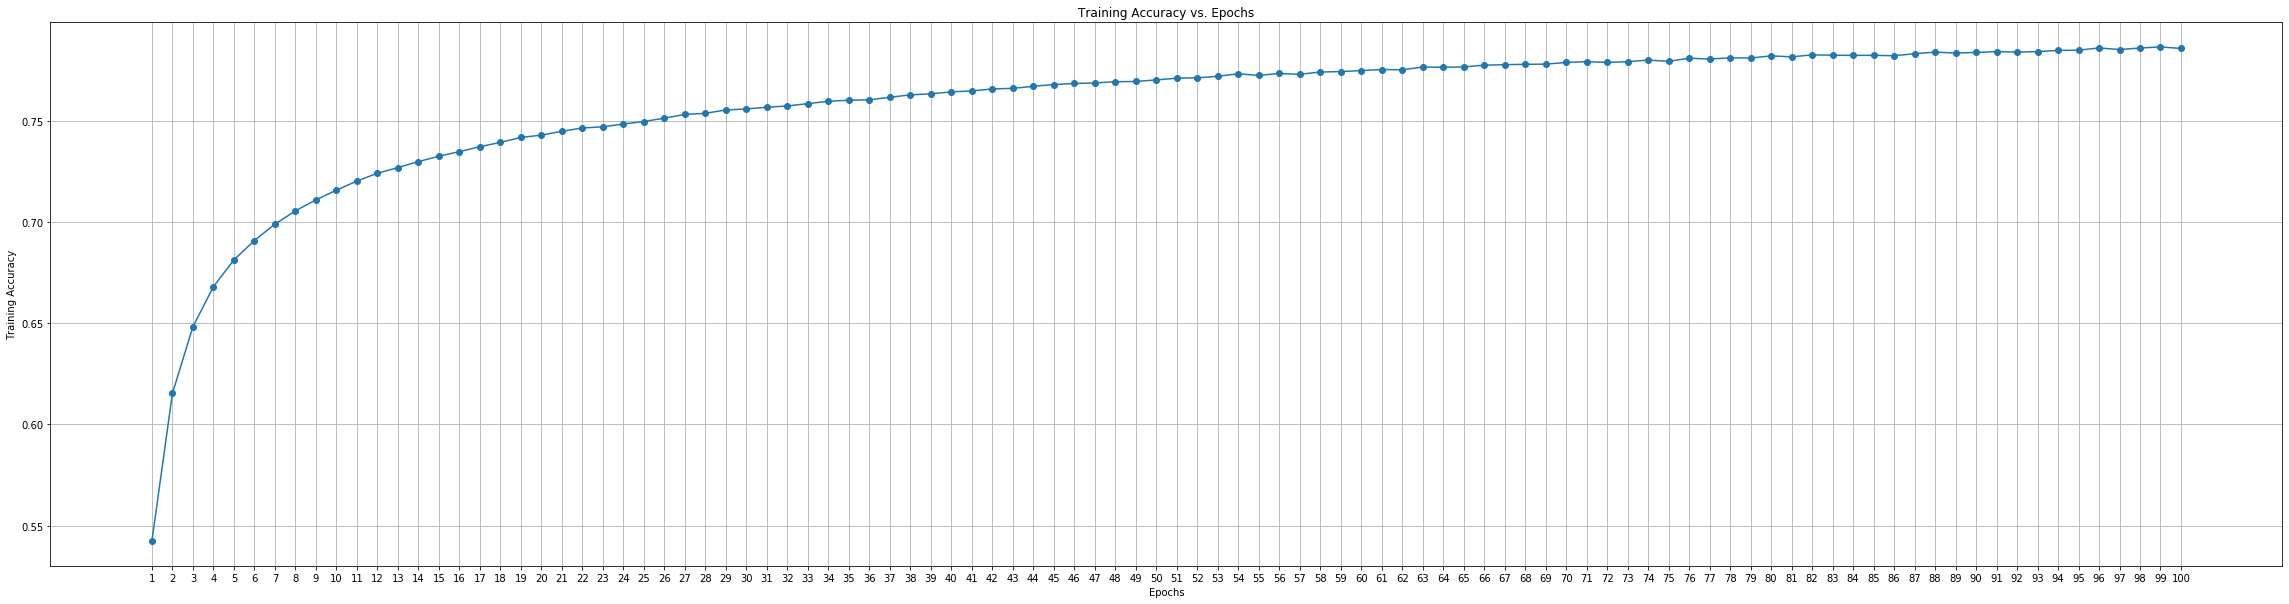

In [117]:
epochs_list = [i for i in range(1,101)]
plt.figure(figsize=(40,10))
plt.plot(epochs_list, train_accuracies, marker='o', linestyle='-')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Training Accuracy vs. Epochs')
plt.grid(True)
plt.xticks(range(1,101))

plt.show()

In [122]:
summ = 0
for i in train_accuracies:
    summ+=i[0]
print(summ)

75.76282197237015


In [119]:
max(train_accuracies)

[0.7863569]